# Quora Questions: Semantic Textual Similarity 

Quora is a place to gain and share knowledge about anything. It’s a platform to ask questions and connect with people who contribute unique insights and quality answers. This empowers people to learn from each other and to better understand the world. Given two questions, quantify the degree of similarity between the two text-based on Semantic similarity. Semantic Textual Similarity (STS) assesses the degree to which two sentences are semantically equivalent to each other. 

In [460]:
# Importing necessary libraries

import re
import nltk
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 

import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [461]:
# Text Similarity Dataset

data = pd.read_csv(r'C:\Users\Dell\Desktop\Quora_Dataset.csv')
data=data.sample(frac=0.1) # Taking 10% of the dataset as it's quite large 
data.head()

,Question1,Question2
63319,Do you want to travel?,Where do you want to travel?
286671,What are some whatspp hacks?,What are some awesome WhatsApp profile pictures?
99785,Can going to counseling keep me from joining t...,How much of an impact do paid internships have...
385135,What is it that girls look for in a guy?,What does a girl look for first in a guy?
301363,How do I get rank in CA final without studying?,How do I prepare for CA final examination?


In [462]:
# Changing the column name as text1 & text2
data.rename(columns={'Question1':'text1','Question2':'text2'},inplace=True)

# Removing null rows 
data.dropna(axis=0,inplace=True)

In [463]:
# check if sentence length is shorter than 3
def check_rows(dataframe): 
    for index,words in enumerate(dataframe):
        if len(words.split())<3:
            dataframe[index]=np.nan

In [464]:
# Replacing rows with np.nan if sentence length is shorter than 2                                     
check_rows(data['text1'])
check_rows(data['text2'])

# Rows with replaced nan values
data.isna().sum()

text1    0
text2    0
dtype: int64

In [465]:
# Removing null rows and finalizing the dataset 
data=data.dropna(axis=0).reset_index(drop=True)

# Quick analysis of special characters, short length and stop words 

In [466]:
# Calculating '%' of stop words, numbers & special characters and shorter length words

def calculate(check_df,main_df):
    try:
        return round(len(check_df.split())/len(main_df.split())*100,2)
    except ValueError:
        print('Nature of Error: Zero division error')

# Importing stopwords from NLTK
        
from nltk.corpus import stopwords
stop=stopwords.words('english')
#Adding missing stop words
stop.extend(['ought','isnt','are','arent','can','cant','dont','didnt','could','couldnt','will','wouldnt','need','must',
             'mustnt','shouldnt','werent','might','havent','doesnt','aint','wasnt','hadnt','hasnt','might'])
        
# Removing " ' " from stopwords
# For instance Doesn't will become Doesnt
    
stopwords=[]
for word in stop:
    word=re.sub("'","",word)
    stopwords.append(word.lower())

In [467]:
# Finding out stopwords, special characters and short length words 

stop1 = data['text1'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() in stopwords]))
stop2 = data['text2'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() in stopwords]))

char1 = data['text1'].str.replace("[0-9a-zA-Z]"," ")
char2 = data['text2'].str.replace("[0-9a-zA-Z]"," ")

short1 = data['text1'].apply(lambda x: ' '.join([word for word in x.split() if len(word)<3]))
short2 = data['text2'].apply(lambda x: ' '.join([word for word in x.split() if len(word)<3]))

# Results will be appended in these empty lists

special_characters_text1 = []
special_characters_text2 = []
stop_words_text1 = []
stop_words_text2 = []
short_length_text1 = []
short_length_text2 = []

ID = []
    
for i in range(len(data['text1'])):

    stop_words_text1.append(calculate(stop1[i],data['text1'][i]))
    special_characters_text1.append(calculate(char1[i],data['text1'][i]))
    short_length_text1.append(calculate(short1[i],data['text1'][i]))
    ID.append(i)   
    
for i in range(len(data['text2'])):
    stop_words_text2.append(calculate(stop2[i],data['text2'][i]))
    special_characters_text2.append(calculate(char2[i],data['text2'][i]))
    short_length_text2.append(calculate(short2[i],data['text2'][i]))  
    
# Creating a dictionary with the above values
                              
data_dict = { 'Unique_ID': ID,'stopwords_text1  (%)': stop_words_text1,
              'stopwords_text2  (%)': stop_words_text2,
              'special_characters_text1  (%)': special_characters_text1,
              'special_characters_text2  (%)': special_characters_text2,
              'short_length_text1  (%)': short_length_text1,
              'short_length_text2  (%)': short_length_text2}                              

# creating a combined dataframe 

data_combined = pd.DataFrame(data_dict)  

data_combined.head(10)

,Unique_ID,stopwords_text1 (%),stopwords_text2 (%),special_characters_text1 (%),special_characters_text2 (%),short_length_text1 (%),short_length_text2 (%)
0,0,60.00,66.67,20.00,16.67,40.00,33.33
1,1,60.00,42.86,20.00,14.29,0.00,0.00
2,2,50.00,50.00,10.00,8.33,20.00,33.33
3,3,70.00,60.00,10.00,10.00,40.00,30.00
4,4,40.00,50.00,10.00,12.50,40.00,37.50
5,5,33.33,45.45,11.11,9.09,11.11,18.18
6,6,50.00,46.67,8.33,6.67,25.00,26.67
7,7,60.00,54.55,10.00,9.09,50.00,36.36
8,8,35.29,42.86,17.65,21.43,17.65,35.71
9,9,43.48,34.78,17.39,21.74,21.74,17.39


# Data Cleaning: Removing special characters,numbers and stop words

In [468]:
# Removing special characters from text1 and text2 as they hold no significance 

data['text1'] = data['text1'].str.replace("[^a-zA-Z]"," ")
data['text2'] = data['text2'].str.replace("[^a-zA-Z]"," ")

# Removing stopwords using nltk library
# Adding a few missing stopwords to the 'stopwords list' 
# using ' '.join otherwise x.split() would tokenize the dataframe

data['text1'] = data['text1'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stopwords]))
data['text2'] = data['text2'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stopwords]))

# Pre-processing: Tokenization and Lemmatization 

In [469]:
# Tokenization is the process of splitting a string of text into tokens

text1_tokenized = data['text1'].apply(lambda x: x.split())
text2_tokenized = data['text2'].apply(lambda x: x.split())

In [471]:
# Lemmatization is the process of grouping words into their root form

from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

data['text1'] = text1_tokenized.apply(lambda x: [lemmatizer.lemmatize(word) for word in x])
data['text2'] = text2_tokenized.apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

# Removing words with word length less than 2
# using ' '.join otherwise x.split() would tokenize the dataframe 

data['text1'] = data['text1'].apply(lambda x: ' '.join([word for word in x if len(word)>2]))
data['text2'] = data['text2'].apply(lambda x: ' '.join([word for word in x if len(word)>2]))

In [473]:
# Updated/Cleaned dataset

data.head()

,text1,text2
0,want travel,want travel
1,whatspp hack,awesome WhatsApp profile picture
2,going counseling keep joining military,much impact paid internship income diversity
3,girl look guy,girl look first guy
4,get rank final without studying,prepare final examination


# Visualization of the most frequent words

In [474]:
from nltk.probability import FreqDist

# Appending the complete dataframe into a single paragraph
# By doing so we can determine the most common words based on their occurences

paragraph_text1 = []
paragraph_text2 = []

for sentence in data['text1']: # for text1
    paragraph_text1.append(sentence)

for sentence in data['text2']: # for text2
    paragraph_text2.append(sentence)

paragraph_text1 = ' '.join(paragraph_text1)
paragraph_text2 = ' '.join(paragraph_text2)    

In [475]:
# Tokenizing the paragraphs and Determining frequency for each word: Text1

frequent_words_text1 =  FreqDist()

for word in nltk.word_tokenize(paragraph_text1):
    frequent_words_text1[word.lower()]+=1

In [476]:
# Tokenizing the paragraphs and Determining frequency for each word: Text2

frequent_words_text2 =  FreqDist()
    
for word in nltk.word_tokenize(paragraph_text2):   
    frequent_words_text2[word.lower()]+=1

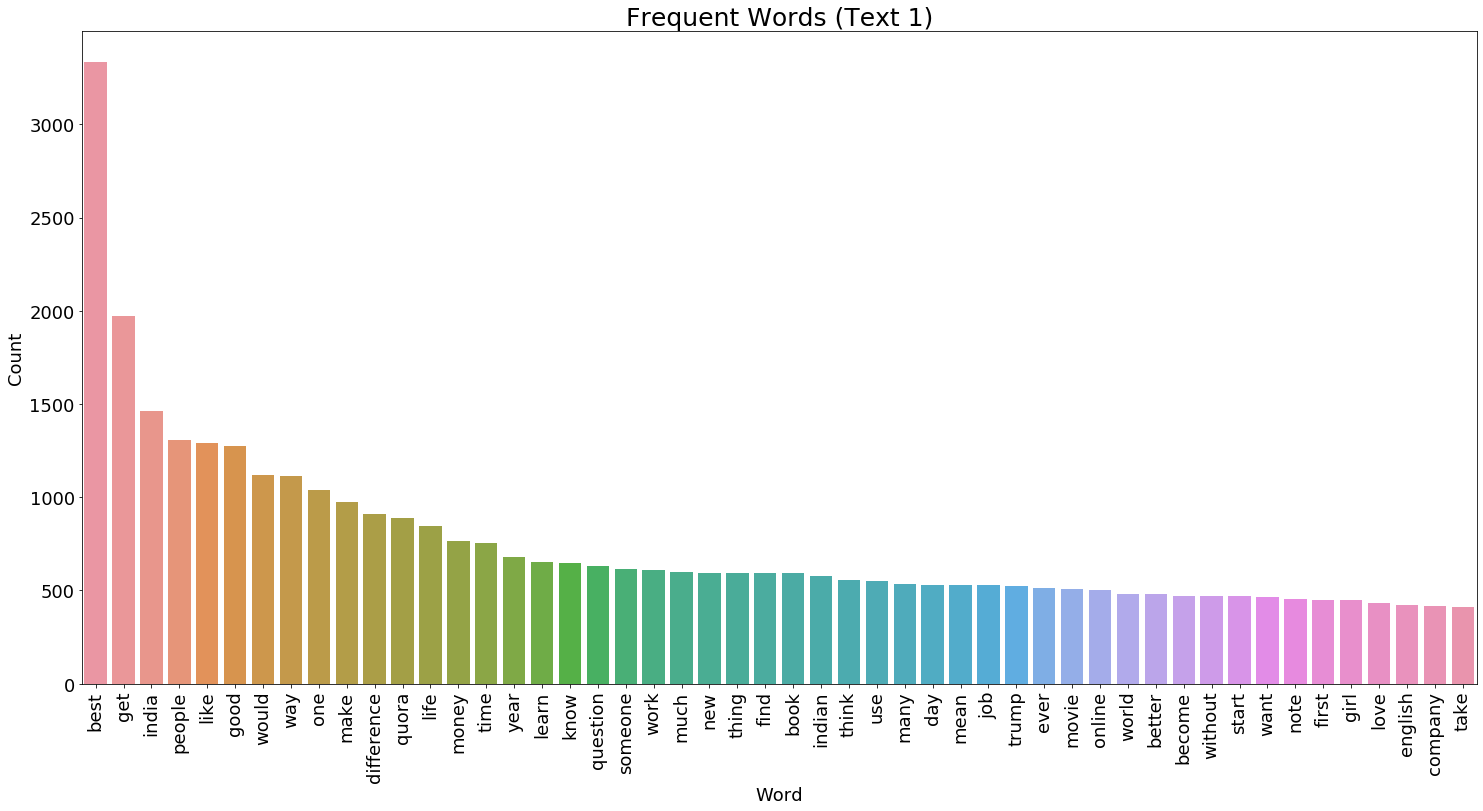

In [481]:
# Creating a pandas dataframe and using seaborn for a barplot: Top 50 words

df = pd.DataFrame({'Word': [word for word in frequent_words_text1.keys()],
                   'Count': [count for count in frequent_words_text1.values()]})

df = df.nlargest(columns='Count',n=50)

# Count plot of Text 1

plt.figure(figsize=(25,12))
sns.barplot(data=df, x= "Word", y = "Count")
plt.title('Frequent Words (Text 1)',fontsize=25)
plt.xticks(rotation=90,fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel('Word',fontsize=18)
plt.ylabel('Count',fontsize=18)
sns.barplot(data=df, x= "Word", y = "Count")
plt.show()

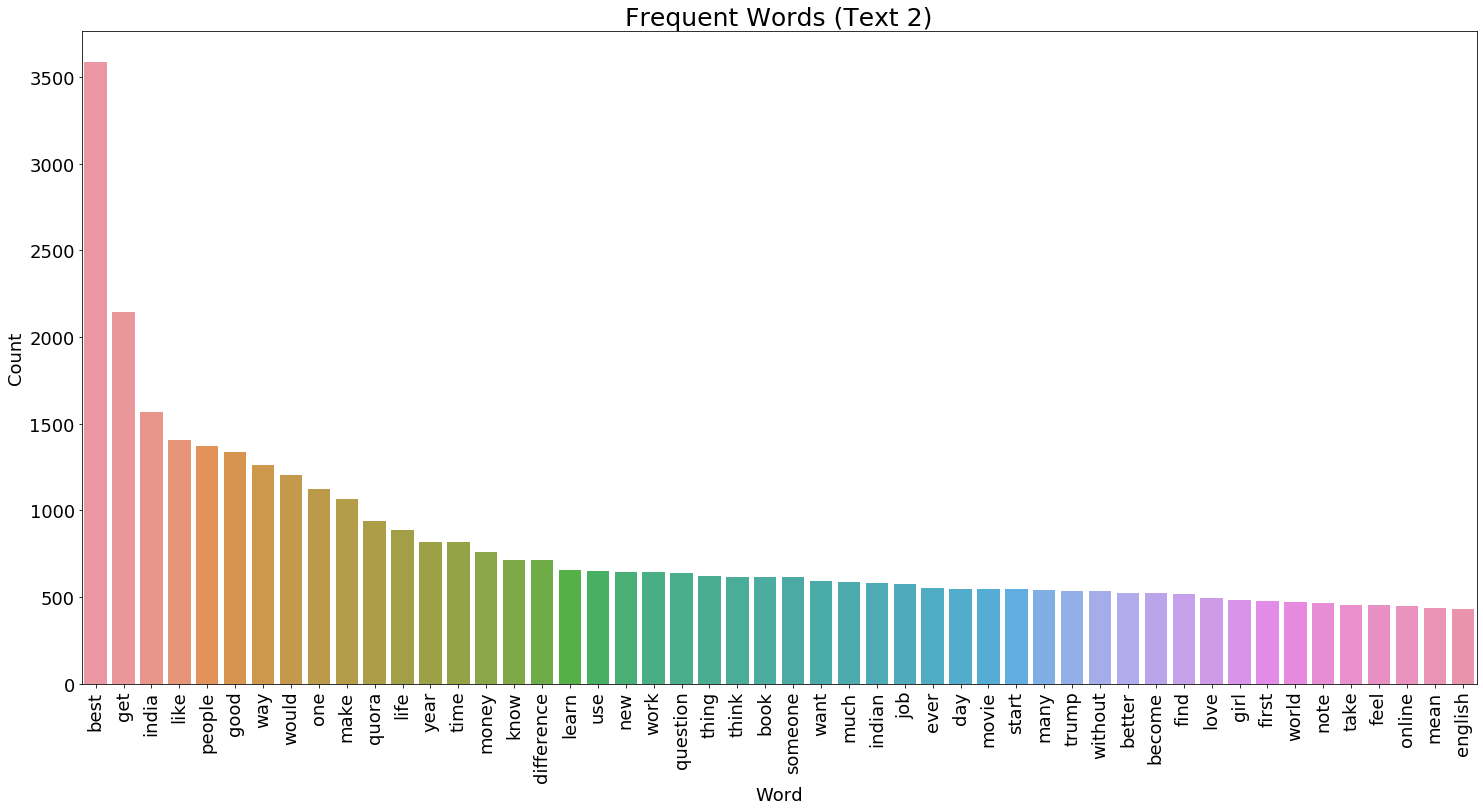

In [482]:
# Creating a pandas dataframe for Text 2 

df = pd.DataFrame({'Word': [word for word in frequent_words_text2.keys()],
                   'Count': [count for count in frequent_words_text2.values()]})

df = df.nlargest(columns='Count',n=50)

# Count plot of Text 2: Top 50 words

plt.figure(figsize=(25,12))
plt.xticks(rotation=90,fontsize=18)
plt.title('Frequent Words (Text 2)',fontsize=25)
plt.yticks(fontsize=18)
plt.xlabel('Word',fontsize=18)
plt.ylabel('Count',fontsize=18)
sns.barplot(data=df, x= "Word", y = "Count")
plt.show()

# Model Building (unsupervised learning)

In [483]:
# Doc2Vec is an unsupervised, deep learning technique

import gensim 
from gensim.models.doc2vec import TaggedDocument
from gensim.models import Doc2Vec 

In [484]:
# suppressing warning message
pd.set_option('mode.chained_assignment', None)

# ID_text1, ID_text2 will be linked to text1 and text2
# in order to create seperate Tagged Documents

data['ID_text1']=0

for index in range(len(data['text1'])):
    data['ID_text1'][index]=index
    
data['ID_text2']=0

for index in range(len(data['text2'])):
    data['ID_text2'][index]=index
    
data.head()   

,text1,text2,ID_text1,ID_text2
0,want travel,want travel,0,0
1,whatspp hack,awesome WhatsApp profile picture,1,1
2,going counseling keep joining military,much impact paid internship income diversity,2,2
3,girl look guy,girl look first guy,3,3
4,get rank final without studying,prepare final examination,4,4


In [485]:
# text1 and text2 must be split up into words along with their corresponding tags 

text_labeled = []

for i in range(len(data['text1'])):
    text_labeled.append(TaggedDocument(data['text1'][i].split(),data[data.index==i].ID_text1))
    text_labeled.append(TaggedDocument(data['text2'][i].split(),data[data.index==i].ID_text2))

In [486]:
# Creating a doc2vec model: the documents are analyzed by training a neural network

# Here,
# Vector_Size = Number of features (Dimensionality)
# Min_count = Minimum frequency of a term
# Alpha = learning rate
# Window = The maximum distance between the current and predicted word within a sentence.
# If dm=1, ‘distributed memory’ (PV-DM) is used

model = Doc2Vec(dm = 1, min_count=1, window=2, vector_size=500, sample=1e-4, negative=10,workers=8)

# Building a vocabulary of unique words

model.build_vocab(text_labeled)

In [538]:
print("-> Tagged Documents Created Successfully!!!")
text_labeled[0:5] # Check labels for first 5 documents

-> Tagged Documents Created Successfully!!!


[TaggedDocument(words=['want', 'travel'], tags=0    0
 Name: ID_text1, dtype: int64),
 TaggedDocument(words=['want', 'travel'], tags=0    0
 Name: ID_text2, dtype: int64),
 TaggedDocument(words=['whatspp', 'hack'], tags=1    1
 Name: ID_text1, dtype: int64),
 TaggedDocument(words=['awesome', 'WhatsApp', 'profile', 'picture'], tags=1    1
 Name: ID_text2, dtype: int64),
 TaggedDocument(words=['going', 'counseling', 'keep', 'joining', 'military'], tags=2    2
 Name: ID_text1, dtype: int64)]

In [487]:
# Training the Model with 20 epoch iterations
# I also tried with 50 epochs but results were almost the same 
# and it took twice the computing time

for epoch in range(1,21): # 1 to 20
    
    model.train(text_labeled,epochs=model.iter,total_examples=model.corpus_count)
    
    if epoch%4==0: # Message will be printed 5 times instead of 20
        print("Epoch is {} % complete".format((epoch/20)*100))

Epoch is 20.0 % complete
Epoch is 40.0 % complete
Epoch is 60.0 % complete
Epoch is 80.0 % complete
Epoch is 100.0 % complete


* The model has been trained successfully. Doc2vec is a document vectorization similar to word embedding but here the entire paragraph/sentence is used for similarity check. Doc2vec uses an unsupervised deep learning technique so, a labelled dataset isn't required.

# Determining Textual Similarity Scores

In [492]:
# Splitting the sentences into seperate words
# text1_split and text2_split will be used for similarity check

text1_split = []

for index in range(len(data['text1'])):
    text1_split.append(data['text1'][index].split())

# Checking for empty list; if yes then we'll have to remove it 
for empty_list in text1_split:
    if empty_list==[]:
        text1_split.remove(empty_list)    

text2_split = []

for index in range(len(data['text2'])):
    text2_split.append(data['text2'][index].split())

# Checking for empty list; if yes then we'll have to remove it 
for empty_list in text2_split:
    if empty_list==[]:
        text2_split.remove(empty_list)
        
# Appending the scores in a list
similarity_score=[]

for index in range(len(text1_split)):
    score=model.n_similarity(text1_split[index],text2_split[index])
    similarity_score.append(score)

In [513]:
# Creating a new dataframe with similarity scores

df = pd.DataFrame({'Similarity_Score':similarity_score})

In [530]:
# Concating the original dataframe with the new dataframe

final_df = pd.concat([data,df],sort=False,axis=1)
final_df.drop(columns=['ID_text1','ID_text2'],axis=1,inplace=True)
final_df.dropna(axis=0,inplace=True)
final_df.rename(columns={'text1':'Cleaned_Question1','text2':'Cleaned_Question2'},inplace=True)

# Final Model Check

In [544]:
# Checking out 10 random questions with "high textual similarity"

final_df[final_df['Similarity_Score']>0.7].reset_index(drop=True).head(10)

,Cleaned_Question1,Cleaned_Question2,Similarity_Score
0,want travel,want travel,1.000000
1,girl look guy,girl look first guy,0.900365
2,company provides best SEO service Delhi,best SEO Company Delhi Digital marketing,0.732901
3,people ask question Quora simply googled,people ask stupid question Quora easily answer...,0.894668
4,difference autism mentally retarded patient,difference autism ADHD,0.853592
5,block people ask stupid question Quora,ask stupid question Quora,0.928393
6,woman treated badly India,woman treated India,0.974896
7,easiest way make money online,best way make money online anyone tell easiest...,0.896855
8,good site download Marathi book,download free book Hindi novel,0.745371
9,low want get law school,low grade still get law school,0.840798


In [532]:
# Exporting the csv file containing Unique_ID and Similarity scores

Text_Similarity_df = final_df.drop(columns=['Cleaned_Question1','Cleaned_Question2'],axis=1)
Text_Similarity_df.to_csv(r'C:\Users\Dell\Desktop\Text_Similarity_Scores.csv', index=False)

Some "Real world" Applications of Semantic Textual Similarity are:-

* Accurate Plagiarism testing by publication agencies/journals. 
* Question-Answer platforms like quora or reddit can check if the answer is copied from another user.
* To check if the questions with same context have the same meaning.

> This is a bonafide work of Aarush Gandhi